In [70]:
# Applying Cross Validation methods on a KNN model

# KNN model
# 1° K-Fold 
# 2° Stratified K-Fold
# 3° Leave One-Out  
# 4° Leave P-Out
# 5° ShuffleSplit

In [71]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split # Split arrays or matrices into random train and test subsets
from sklearn.neighbors import KNeighborsClassifier # Classifier implementing the k-nearest neighbors vote.
from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance.
from sklearn.metrics import classification_report, confusion_matrix # Compute precision, recall, F-measure and support for each class

In [13]:
# Reading a comma-separated values (csv) file into DataFrame
df = pd.read_csv('diabetes.csv') 

In [14]:
# Applying KNN 

# Standarization
scaler =StandardScaler()
scaler.fit(df.drop("Outcome", axis = 1 ))
# Building the scaled dataframe
scaled_features = scaler.transform(df.drop("Outcome", axis = 1))
scaled_features
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1]) #except the last column
df_feat
X = df_feat
y = df["Outcome"]
# Spliting dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# Choosing the best K
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))



Text(0, 0.5, 'Error K')

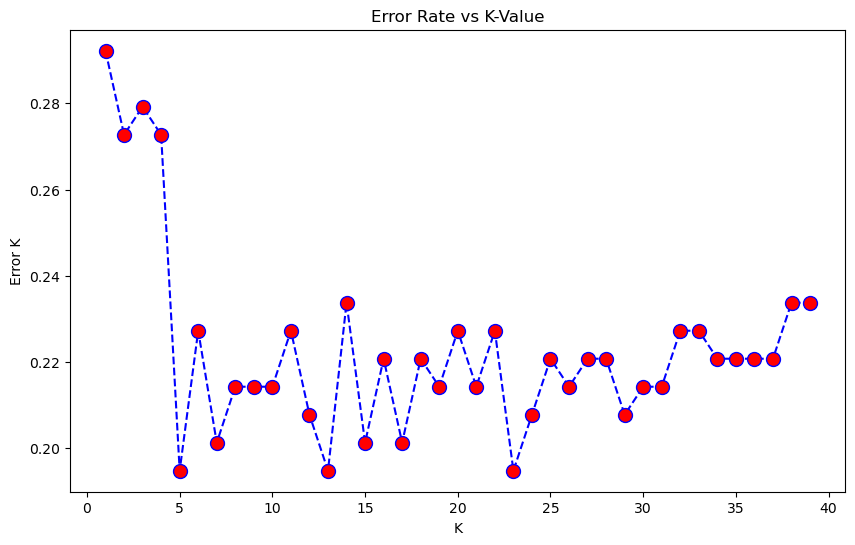

In [15]:
# Elbow method
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', 
         linestyle = 'dashed', marker = 'o', 
         markerfacecolor = 'red', markersize = 10)
plt.title("Error Rate vs K-Value")
plt.xlabel("K")
plt.ylabel("Error K")

In [16]:
# Evaluating the model on K=5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[90  9]
 [21 34]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        99
           1       0.79      0.62      0.69        55

    accuracy                           0.81       154
   macro avg       0.80      0.76      0.78       154
weighted avg       0.80      0.81      0.80       154



In [ ]:
#Cross validation methods

In [72]:
# importing the libraries???
from sklearn.model_selection import cross_val_score

In [73]:
# K-Fold
from sklearn.model_selection import KFold 
kf_scores = []
k = 5
kf = KFold(n_splits=k)
kf_scores = cross_val_score(knn, X, y, scoring = 'accuracy', cv=kf)
np.mean(kf_scores)

0.7291910703675409

In [74]:
# Stratified K-Fold
from sklearn.model_selection import StratifiedKFold
sk_scores = []
sk_folds = StratifiedKFold(n_splits = 5)
sk_scores = cross_val_score(knn, X, y, scoring = 'accuracy', cv = sk_folds)
#np.mean(sk_scores)
print("Cross Validation Scores: ", sk_scores)
print("Average CV Score: ", sk_scores.mean())
print("Number of CV Scores used in Average: ", len(sk_scores))

Cross Validation Scores:  [0.72077922 0.73376623 0.71428571 0.77124183 0.7254902 ]
Average CV Score:  0.733112638994992
Number of CV Scores used in Average:  5


In [75]:
# leave One-Out
from sklearn.model_selection import LeaveOneOut
loo_scores = []
loo = LeaveOneOut()
loo_scores = cross_val_score(knn, X, y, scoring = 'accuracy', cv = loo)
#np.mean(sk_scores)
# print("Cross Validation Scores: ", loo_scores) 
print("Average CV Score: ", loo_scores.mean())
print("Number of CV Scores used in Average: ", len(loo_scores))



Average CV Score:  0.7421875
Number of CV Scores used in Average:  768


In [76]:
# leave One-Out
from sklearn.model_selection import LeavePOut
lpo_scores = []
lpo = LeavePOut(p=2)
lpo_scores = cross_val_score(knn, X, y, scoring = 'accuracy', cv = loo)
#np.mean(sk_scores)
# print("Cross Validation Scores: ", lpo_scores) 
print("Average CV Score: ", lpo_scores.mean())
print("Number of CV Scores used in Average: ", len(lpo_scores))

Average CV Score:  0.7421875
Number of CV Scores used in Average:  768


In [77]:
# ShuffleSplit
from sklearn.model_selection import ShuffleSplit
ss_scores = []
ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits = 5)
ss_scores = cross_val_score(knn, X, y, scoring = 'accuracy', cv = ss)
#np.mean(sk_scores)
#print("Cross Validation Scores: ", lpo_scores) 
print("Average CV Score: ", ss_scores.mean())
print("Number of CV Scores used in Average: ", len(ss_scores))


Average CV Score:  0.7307359307359307
Number of CV Scores used in Average:  5


In [ ]:
# https://www.w3schools.com/python/python_ml_cross_validation.asp